# Advanced Visualisation of Lorenz Attractor
---

***Author: Piotr Skalski***

This notebook is a simple tutorial about creating advanced, animated visualizations using Matplotlib. I will show you step by step how to build a fantastic effect with the help of simple tools.

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.animation import FuncAnimation

### Settings

In [30]:
# length of the time step
DELTA_T = 0.01
# number of time steps
STEPS = 2000
# number of model time steps per animation frame
STEPS_PER_FRAME = 4
# plot padding
PADDING = 2.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "lorenz_attractor"

### Auxiliary functions

In [3]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

def build_lorenz_trajectory(dt, steps, initial_values=(0., 1., 1.05), s=10, r=28, b=2.667):
    xs = np.empty((steps + 1,))
    ys = np.empty((steps + 1,))
    zs = np.empty((steps + 1,))
    
    xs[0], ys[0], zs[0] = initial_values
    
    for i in range(steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    return (xs, ys, zs)

In [4]:
# create a blank 3D chart with styling
def create_blank_chart_with_styling(size):
    # my favorite styling kit
    plt.style.use('dark_background')
    # determining the size of the graph
    fig = plt.figure(figsize=size)
    # 3D mode
    ax = fig.gca(projection='3d')
    # transparent axis pane background 
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # setting chart axis names
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    return (fig, ax)

### Render separate frames

In [22]:
def create_frames(dt, steps, padding, output_dir):
    fig, ax = create_blank_chart_with_styling((6, 6))
    # creation of data describing the trajectory 
    xs, ys, zs = build_lorenz_trajectory(dt, steps)
    # setting the fixed range of axes
    ax.set_xlim3d(xs.min() - padding, xs.max() + padding)
    ax.set_ylim3d(ys.min() - padding, ys.max() + padding)
    ax.set_zlim3d(zs.min() - padding, zs.max() + padding)

    for i in range(steps-1):
        # the colour of the line will change over time
        ax.plot(xs[i:i+2], ys[i:i+2], zs[i:i+2], color=plt.cm.viridis(1 - i/steps), lw=2)
        # angle of view on the graph
        ax.view_init(30, 45 + i)
        # saving the frame in a file with the appropriate index
        plt.savefig("./" + output_dir + "/lorenz_{:0>5d}.png".format(i))

    plt.close()

In [23]:
create_frames(int(DELTA_T, STEPS, PADDING, OUTPUT_DIR))

### Using Matplotlib animation API

In [67]:
start_point_1 = (0., 1., 1.05)
start_point_2 = (0., 1., 1.06)
start_point_3 = (0., 1., 1.07)
fig, ax = create_blank_chart_with_styling((6, 6))
xs_1, ys_1, zs_1 = build_lorenz_trajectory(DELTA_T, STEPS, initial_values=start_point_1)
xs_2, ys_2, zs_2 = build_lorenz_trajectory(DELTA_T, STEPS, initial_values=start_point_2)
xs_3, ys_3, zs_3 = build_lorenz_trajectory(DELTA_T, STEPS, initial_values=start_point_3)
padding = PADDING
ax.set_xlim3d(xs_1.min() - padding, xs_1.max() + padding)
ax.set_ylim3d(ys_1.min() - padding, ys_1.max() + padding)
ax.set_zlim3d(zs_1.min() - padding, zs_1.max() + padding)
plt.close()

In [68]:
def update(i):
    frame_start = i * STEPS_PER_FRAME
    frame_end = (i + 1) * STEPS_PER_FRAME + 1
    ax.plot(xs_1[frame_start:frame_end], ys_1[frame_start:frame_end], zs_1[frame_start:frame_end], color="#FFFFFF", lw=2, alpha=0.75)
    ax.plot(xs_2[frame_start:frame_end], ys_2[frame_start:frame_end], zs_2[frame_start:frame_end], color="#0080FF", lw=2, alpha=0.75)
    ax.plot(xs_3[frame_start:frame_end], ys_3[frame_start:frame_end], zs_3[frame_start:frame_end], color="#000080", lw=2, alpha=0.75)
    ax.view_init(30, 45 + i/2)

In [69]:
anim = FuncAnimation(fig, update, frames=np.arange(0, int(STEPS/STEPS_PER_FRAME)), interval=10)

In [70]:
anim.save('line.gif', dpi=80, writer='imagemagick')

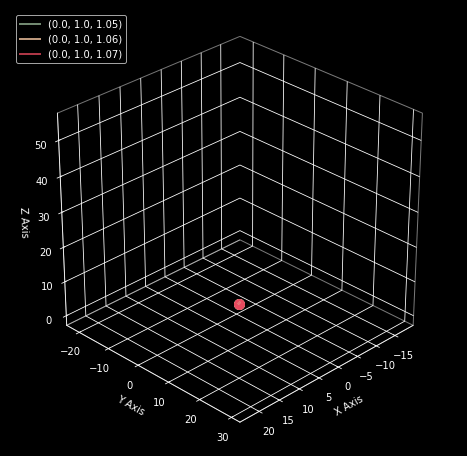

In [31]:
initial_conditions = [
    (0., 1., 1.05),
    (0., 1., 1.06),
    (0., 1., 1.07),
]
colors = [
    "#99b898",
    "#fecea8",
    "#e84a5f",
]

fig, ax = create_blank_chart_with_styling((8, 8))
plots = [ax.plot([],[],[], color=colors[i], label=str(initial_conditions[i]),
                 lw=2, alpha=0.75, animated=True)[0] for i in range(3)]
dots = [ax.scatter([],[],[], s=100, c=colors[i], animated=True) for i in range(3)]

plots_data = [build_lorenz_trajectory(DELTA_T, STEPS, 
    initial_values=initial_conditions[i]) for i in range(3)]

xs, ys, zs = plots_data[0]
padding = PADDING
ax.set_xlim3d(xs.min() - padding, xs.max() + padding)
ax.set_ylim3d(ys.min() - padding, ys.max() + padding)
ax.set_zlim3d(zs.min() - padding, zs.max() + padding)

def update(i):
    frame_end = (i + 1) * STEPS_PER_FRAME
    for plot, dot, data in zip(plots, dots, plots_data):
        xs, ys, zs = data
        plot.set_data(xs[:frame_end], ys[:frame_end])
        plot.set_3d_properties(zs[:frame_end])
        dot._offsets3d = ([xs[frame_end]], [ys[frame_end]], [zs[frame_end]])
        
    ax.legend(loc=2, prop={'size': 10})
    ax.view_init(30, 45 + i)
        
anim = FuncAnimation(fig, update, frames=np.arange(0, int(STEPS/STEPS_PER_FRAME)), interval=40)
anim.save('line.gif', dpi=80, writer='imagemagick')